In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the master CSV file with engineered features
df = pd.read_csv('../data/new/master_with_engineered_features.csv')

# Display the first few rows of the DataFrame
df.head()

,answer_id,is_correct,created_at,user_id,grade_name,school_id,school_name,user_level,question_id,options,...,option_a,option_b,option_c,option_d,option_e,correct_option_matches,student_answer_matches,correct_option_letter,student_answer_letter,student_age
0,1494041,True,2022-10-20 02:28:52.516332,2315,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24857,"""---\n- \""`-32`\""\n- \""`-31`\""\n- \""`-34`\""\n-...",...,`-32`,`-31`,`-34`,`-23`,`-33`,True,True,e,e,18.0
1,1494042,True,2022-10-20 02:29:27.909258,2315,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24889,"""---\n- \""`-25`\""\n- \""`-26`\""\n- \""`-23`\""\n-...",...,`-25`,`-26`,`-23`,`-14`,`-24`,True,True,e,e,18.0
2,1494043,True,2022-10-20 02:29:41.707754,2315,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24906,"""---\n- \""`-84`\""\n- \""`-83`\""\n- \""`-86`\""\n-...",...,`-84`,`-83`,`-86`,`-75`,`-85`,True,True,e,e,18.0
3,1494044,True,2022-10-20 02:29:54.616890,2315,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,25257,"""---\n- \""`14`\""\n- \""`15`\""\n- \""`16`\""\n- \""...",...,`14`,`15`,`16`,`13`,`12`,True,True,a,a,18.0
4,1494045,True,2022-10-20 02:30:21.414016,2315,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24885,"""---\n- \""`-60`\""\n- \""`-61`\""\n- \""`-58`\""\n-...",...,`-60`,`-61`,`-58`,`-49`,`-59`,True,True,e,e,18.0


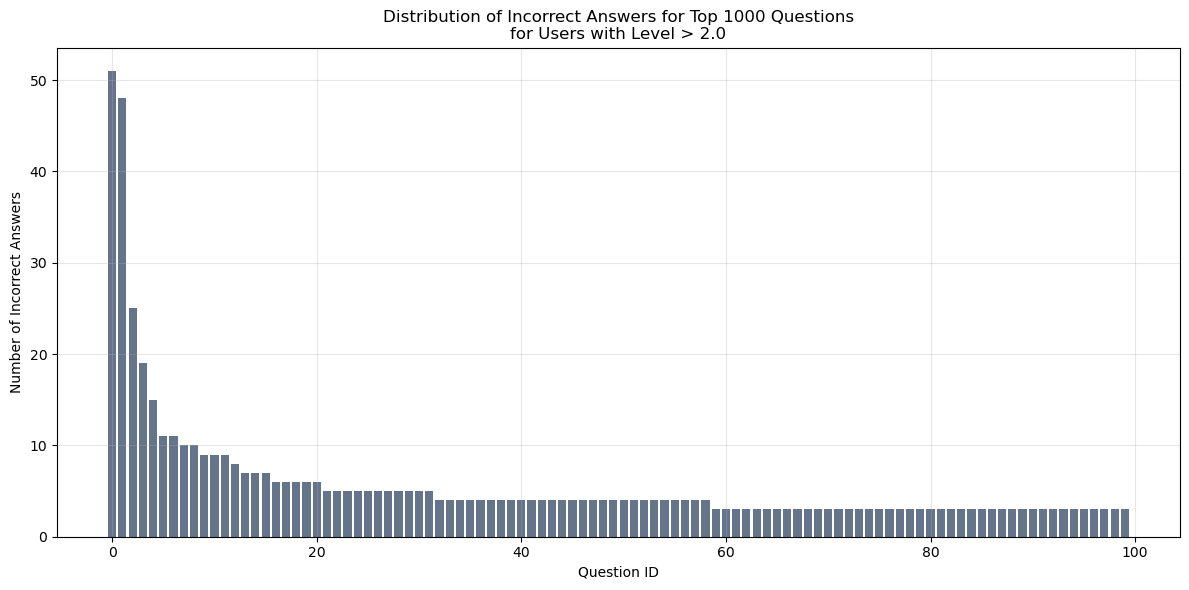

Number of questions shown: 100
Average incorrect answers per question: 5.72
Maximum incorrect answers for a single question: 51


In [7]:
# Filter for users with level > 2.0 and incorrect answers
filtered_df = df[
    (df['user_level'] > 2.0) & 
    (df['is_correct'] == False)
]

# Count incorrect answers per question and get top 1000
incorrect_counts = filtered_df['question_title'].value_counts().head(100)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(incorrect_counts)), incorrect_counts.values, color='#64748B')
plt.xlabel('Question ID')
plt.ylabel('Number of Incorrect Answers')
plt.title('Distribution of Incorrect Answers for Top 1000 Questions\nfor Users with Level > 2.0')

# Customize appearance
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of questions shown: {len(incorrect_counts)}")
print(f"Average incorrect answers per question: {incorrect_counts.mean():.2f}")
print(f"Maximum incorrect answers for a single question: {incorrect_counts.max()}")


In [10]:
# Get the question titles for the top 10 most incorrect answers
top_10_questions = incorrect_counts.head(10)

# Get the corresponding question details from the original dataframe
question_details_list = []
for question in top_10_questions.index:
    question_row = df[df['question_title'] == question].iloc[0]
    question_details_list.append({
        'Question Title': question,
        'Incorrect Answers': top_10_questions[question],
        'Options': question_row['options'],
        'Correct Answer': question_row['correct_option']
    })

# Convert list of dictionaries to DataFrame
question_details = pd.DataFrame(question_details_list)

# Display the results
print("\nTop 10 Questions with Most Incorrect Answers:")
print("--------------------------------------------")
print(question_details.to_string(index=False))



Top 10 Questions with Most Incorrect Answers:
--------------------------------------------
                                                                                                                                                                 Question Title  Incorrect Answers                                                                                                                                                       Options          Correct Answer
                                      Mateo estaba paseando por el centro con siete primos. Si gastaron 1208 dólares. ¿Cuánto dinero tendrán que pagar si comparten los gastos?                 51                                              "---\n- \"`161` dólares\"\n- \"`152` dólares\"\n- \"`151` dólares\"\n- \"`150` dólares\"\n- \"`149` dólares\"\n"           `151` dólares
                                    Lucas estaba viajando en el extranjero con trece primos. Si en total el grupo gastó 4466 pesos argentinos. ¿Cuánto se 